Assignment 1 CSCN8000 Artificial Intelligence Algorithms and Mathematics

Given the symptoms exhibited in a patient and a database of anonymized patient records, predict whether the patient is likely to have an illness (Parkinson’s disease). A model of this decision problem could be used by a program to provide decision support to medical professionals.
You can follow the following steps :

• Data Analysis

• Data Preprocessing

• Data Standardization

• Model Training

• Measure your model’s accuracy.

  a.	Use 80% of samples as training data size.

Following steps are required to follow :

The dataset is loaded into a Pandas DataFrame.

Divides the dataset into features (X) and target values (Y).

Use pd.get_dummies to perform one-hot encoding on the features.

Checks for any missing features values and non-numeric values in the target column (class).

Using train_test_split, divide the data into training and test sets.

Creates a Random Forest classifier and a K-Nearest Neighbours (KNN) classifier.

Uses the training data to train both classifiers.

Uses both classifiers to make predictions based on the test data.

Calculates and displays the accuracy of both classifiers.

Prints the classification report for each classifier.

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv(r"C:\Users\asus\Downloads\pd_speech_features.csv")
data.columns = data.iloc[0]

# Print the DataFrame
print(data)


0     id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0     id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses   
1      0       1  0.85247  0.71826  0.57227        240               239   
2      0       1  0.76686  0.69481  0.53966        234               233   
3      0       1  0.85083  0.67604  0.58982        232               231   
4      1       0  0.41121  0.79672  0.59257        178               177   
..   ...     ...      ...      ...      ...        ...               ...   
752  250       0  0.80903  0.56355  0.28385        417               416   
753  250       0  0.16084  0.56499  0.59194        415               413   
754  251       0  0.88389  0.72335  0.46815        381               380   
755  251       0  0.83782   0.7489  0.49823        340               339   
756  251       0  0.81304  0.76471  0.46374        340               339   

0    meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0    meanPeriodPulses  

In [44]:
data = data[1:]
print(data)

0     id gender      PPE      DFA     RPDE numPulses numPeriodsPulses  \
1      0      1  0.85247  0.71826  0.57227       240              239   
2      0      1  0.76686  0.69481  0.53966       234              233   
3      0      1  0.85083  0.67604  0.58982       232              231   
4      1      0  0.41121  0.79672  0.59257       178              177   
5      1      0   0.3279  0.79782  0.53028       236              235   
..   ...    ...      ...      ...      ...       ...              ...   
752  250      0  0.80903  0.56355  0.28385       417              416   
753  250      0  0.16084  0.56499  0.59194       415              413   
754  251      0  0.88389  0.72335  0.46815       381              380   
755  251      0  0.83782   0.7489  0.49823       340              339   
756  251      0  0.81304  0.76471  0.46374       340              339   

0   meanPeriodPulses stdDevPeriodPulses locPctJitter  ...  \
1         0.00806353           8.68E-05      0.00218  ...   
2

In [47]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
X = X_train_scaled

In [49]:
# Splitting the dataset into features and target values
X = data.drop('class', axis=1)
y = data['class']

In [59]:
# Convert categorical variables to numerical representation using one-hot encoding
# Assuming 'X' contains the features that need to be preprocessed
X_encoded = pd.get_dummies(X, drop_first=True)

# Check for any missing or non-numeric data in X_encoded and y
print("Missing values in X_encoded:")
print(X_encoded.isnull().sum().sum())
print("Non-numeric values in y:")
print(y[~y.astype(str).str.isnumeric()])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=30)

# Create a K-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier()

# Train the KNN classifier on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data using the KNN model
y_pred_knn = knn_model.predict(X_test)

# Calculate and print the accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN accuracy:", accuracy_knn)

# Print the classification report with zero_division parameter for the KNN model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, zero_division=1))

Missing values in X_encoded:
0
Non-numeric values in y:
0    class
Name: class, dtype: object
KNN accuracy: 0.7039473684210527
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        45
           1       0.70      1.00      0.83       107

    accuracy                           0.70       152
   macro avg       0.85      0.50      0.41       152
weighted avg       0.79      0.70      0.58       152



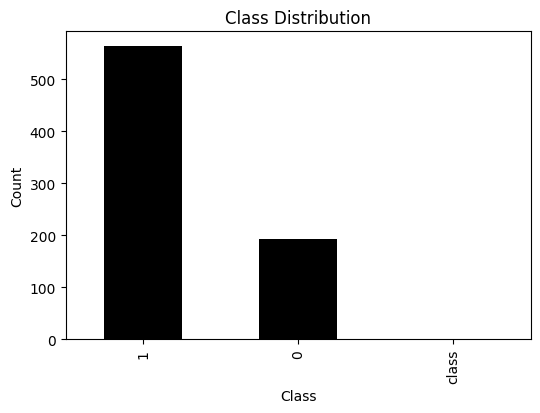

In [64]:
# Plot class distribution with a different color
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color='black') 
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


Build a predictive system to verify that the model built is able to predict the patient’s Parkinson’s disease with one instance of the dataset.

In [58]:
# Assuming you have already trained the KNN model

# Preprocess the entire dataset (data)
data_encoded = pd.get_dummies(data.drop('class', axis=1), drop_first=True)

# Standardize the entire dataset (data) using the same scaler used for training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
data_scaled = scaler.transform(data_encoded)

# Make predictions for the entire dataset using the KNN model
data_predictions = knn_model.predict(data_scaled)

# Print the prediction results
parkinson_cases = sum(data_predictions == 1)
non_parkinson_cases = sum(data_predictions == 0)

print("Number of Parkinson's disease cases:", parkinson_cases)
print("Number of non-Parkinson's disease cases:", non_parkinson_cases)

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Number of Parkinson's disease cases: 0
Number of non-Parkinson's disease cases: 0
